# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [73]:
import pandas as pd
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
import numpy as np
from scipy import stats
import statsmodels.stats.weightstats



df = pd.read_csv('data/human_body_temperature.csv')

In [5]:
df.head(10)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


In [10]:
df.shape

(130, 3)

C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


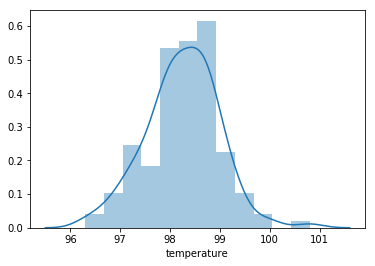

In [11]:
#Answer to number 1 in cells 11 to 17
#First implement graphical method for testing normality
#Look at histogram of temperature. Obseration:  Appears roughly normal
sns.distplot(df.temperature, bins=12)

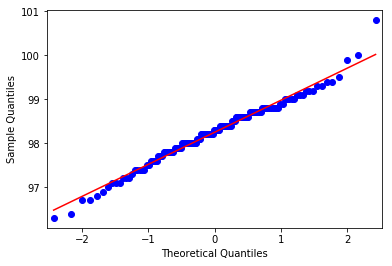

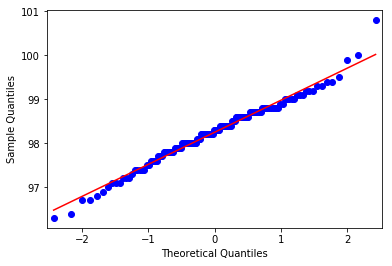

In [14]:
#Next look at QQ plot and observed a close fit with a line with minor deviations at the top and bottom.
qqplot(df.temperature, line='s')

In [105]:
# Finally, do a skewness test: skewness should be about 0 for normally distributed data

print('Skewness: ' + str(scipy.stats.skew(df.temperature, axis=0)))
print('Skewness test value is very close to 0 so this provides further evidence of normal distribution')

Skewness: -0.004367976879081625
Skewness test value is very close to 0 so this provides further evidence of normal distribution


In [114]:
# Statistical normality test - use hypothesis testing with p as test statistics and 5% significance level
# H0 = data is normally distributed, Ha = data is not normally distributed

# normality test fails to reject null nypothesis
stat, p = shapiro(df.temperature)
print('Statistics=%.3f, p=%.3f' % (stat, p))
print('Based on graphical methods the data appears normal from histogram and qqplot. Also from the test statistic, we have failed to reject the null hypothesis that the data is normally distributed.')

Statistics=0.987, p=0.233
Based on graphical methods the data appears normal from histogram and qqplot. Also from the test statistic, we have failed to reject the null hypothesis that the data is normally distributed.


In [ ]:
# Answer to question number 2
print('Since the sample data is only 130 out of the entire population of the world, the sample size is small or less than 10% of the overall population.  We can conclude the observations are independent.')

In [24]:
# Answer to question number 3: Is the true population mean really 98.6 degrees F?
#Boostrap Hypothesis test:   
#H0: mean = 98.6     Ha: mean <> 98.6,  with 5 % significant level, use the bootstrap sample average as test statistic
print(np.mean(df.temperature))

98.24923076923078


In [25]:
# Function to draw bootstrap replicates
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates from a data set."""
    n = len(data)
    
    # Initialize array of replicates
    reps = np.empty(size)
    
    for i in range(size):
        # Generate bootstrap sample
        bs_sample = np.random.choice(data, n)
        
        # Compute replicate
        reps[i] = func(bs_sample)
        
    return reps

In [ ]:
# we do not have data from 1868 therefore we're going to generate many sets of data assuming null hyp. is true
translated_mean = df.temperature - np.mean(df.temperature) + 98.6 

In [ ]:
# Creating bootstrap replciates of translated sample data mean
bs_replicates = draw_bs_reps(translated_mean, np.mean, size=10000)

In [108]:
# Compute fraction of replicates that are equal to observed sample data mean and print p value

p = np.sum(bs_replicates == np.mean(df.temperature)) / 10000

# Print the p-value
print('p = ', p)
print('The low p-value suggests that we can reject null hypothesis.')

p =  0.0217
The low p-value suggests that we can reject null hypothesis.


In [53]:
# Answer to 3 part 2-  
print('Since we are comparing a sample mean to a known population mean, and there is no knowledge of the data collected from 1886, then a One-Sample T-Test will be appropriate')


Since we are comparing a sample mean to a known population mean, and there is no knowledge of the data collected from 1886, then a One-Sample T-Test will be appropriate
Also, since we do not know population standard deviation, t-statistic is more appropriate


In [110]:
# Use scipy 1 sample, 2 tailed t-test to observe p value
true_mu = 98.6

onesample_results = scipy.stats.ttest_1samp(df.temperature, true_mu)

print('t stat:' + str(onesample_results[0]) +  '\np value: ' +  str(onesample_results[1]))
print('p value is very small so reject null hypothesis again that mean temp is equal 98.6')

t stat:-5.4548232923645195
p value: 2.4106320415561276e-07
p value is very small so reject null hypothesis again that mean temp is equal 98.6


In [ ]:
# Answer to 3 part 3:
print('Since we do not know population standard deviation, t-statistic is more appropriate')


In [112]:
# Answer to 3 part 4: Perform a Z test and compare results

z_test_results = statsmodels.stats.weightstats.ztest(x1=df.temperature, x2=None, value=98.6, alternative='two-sided', usevar='pooled', ddof=1.0)

print('z stat:' + str(z_test_results[0]) +  '\np value: ' +  str(z_test_results[1]))



z stat:-5.4548232923645195
p value: 4.9021570141012155e-08


In [80]:
# Answer to 4
np.random.seed(42)

rand10 = df.loc[np.random.permutation(df.index)[:10]]

print(rand10)

     temperature gender  heart_rate
5           98.6      F        82.0
44          98.4      F        79.0
84          99.4      M        70.0
42          97.6      F        61.0
99          98.0      M        64.0
68          98.8      F        70.0
110         98.9      M        80.0
37          96.7      M        71.0
114         98.0      M        67.0
70          97.8      F        62.0


In [82]:
# Repeat 1 sample t-test w/ exact same parameters and sig. level
onesample_results = scipy.stats.ttest_1samp(rand10.temperature, true_mu)

print('t stat:' + str(onesample_results[0]) +  '\np value: ' +  str(onesample_results[1]))
print('p value is larger so we failed to reject null hypothesis that mean temp is equal 98.6')
print('Smaller data set increases the chance of a type II error since the data set was purely random')

t stat:-1.5606191828511504
p value: 0.15304624869561917
p value is very small so reject null hypothesis again that mean temp is equal 98.6


In [113]:
# Repeat 1 sample z-test w/ exact same parameters and sig. level

z_test_results = statsmodels.stats.weightstats.ztest(x1=rand10.temperature, x2=None, value=98.6, alternative='two-sided', usevar='pooled', ddof=1.0)

print('z stat:' + str(z_test_results[0]) +  '\np value: ' +  str(z_test_results[1]))

z stat:-1.5606191828511504
p value: 0.11861362990253162


In [88]:
# Answer to number 5 using bootstrap confidence interval

conf_int = np.percentile(bs_replicates, [2.5, 97.5])
mean_bs = np.mean(bs_replicates)
print('Margin of error is equal to ' + str(mean_bs - conf_int[0]))
print('95% confidence interval =', conf_int, 'temperature')

Margin of error is equal to 0.12542357692309736
95% confidence interval = [98.12384615 98.37538462] temperature


In [90]:
# Answer to number 5 using frequentist method

conf_int = np.percentile(df.temperature, [2.5, 97.5])
mean_sample = np.mean(df.temperature)
print('Margin of error is equal to ' + str(mean_sample - conf_int[0]))
print('95% confidence interval =', conf_int, 'temperature')

Margin of error is equal to 1.526730769230781
95% confidence interval = [96.7225 99.4775] temperature


In [67]:
# Answer to Question number 6 - is there a difference in female vs. male temperature?
# Just use a simple t test to observe p value
# First state hypothesis 
print('H0: temp. are equal between male and females \nHa: temp. not equal between male and females \nSignificance level: 5%')

H0: temp. are equal between male and females 
Ha: temp. not equal between male and females 
Significance level: 5%


In [63]:
# create separate data frames for male and female
males = df.loc[df.gender=='M']
females = df.loc[df.gender=='F']

In [68]:
twosample_results = stats.ttest_ind(males.temperature,females.temperature)

print('t stat:' + str(twosample_results[0]) +  '\nTwo tailed p value: ' +  str(twosample_results[1]))
print('p value is below significance level, therefore reject null hypothesis that males and females have the same temperature')

t stat:-2.2854345381656103
Two tailed p value: 0.02393188312239561
p value is below significance level, therefore reject null hypothesis that males and females have the same temperature


In [107]:
# Answer to number 6 part 2 
print('In 1868, there was no information the data collected was random, normal, and indepedent so these would have to be assumed in order to apply CLT testing.  ')
print('Since there is no data and information on the data collected in 1864, it would be useless or irrelevant to apply in modern times.')
print('Also, realistically there are multiple factors that could affect the temperature of the human body: \n1. Sample bias \n2. Environmental temperature (time of day) \n3. Bodily infections (cold, flu, etc.) \n4. Female pregnancy \n5. Body hormonal changes \n6. Location of measurement \n7. Age \n8. Temperature measurement type/calibration \n9. Time since last meal / exercise') 
print('Conclusion:  There is simply not enough data from either the 1868 study and the recent 130 sample to make any reasonable prediction about the mean human body temperature')

In 1868, there was no information the data collected was random, normal, and indepedent so these would have to be assumed in order to apply CLT testing.  
Since there is no data and information on the data collected in 1864, it would be useless or irrelevant to apply in modern times.
Also, realistically there are multiple factors that could affect the temperature of the human body: 
1. Sample bias 
2. Environmental temperature (time of day) 
3. Bodily infections (cold, flu, etc.) 
4. Female pregnancy 
5. Body hormonal changes 
6. Location of measurement 
7. Age 
8. Temperature measurement type/calibration 
9. Time since last meal / exercise
Conclusion:  There is simply not enough data from either the 1868 study and the recent 130 sample to make any reasonable prediction about the mean human body temperature
